## Selenium 사용 동적 크롤링 - 주유소(셀프로 넣는게 더 싼가?)
- 셀프주유소의 기름값을 보자
- 셀프인곳과 아닌곳의 차이를 보는게 목표

In [1]:
# Selenium 설치.
!pip install selenium

In [2]:
import bs4
import time
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from selenium.webdriver.common.keys import Keys
from selenium import webdriver

### 1. 사이트에 들어가서 탐색해 본다

1. 먼저 다음 사이트에 들어가서 살펴본다:  [Opinet](http://www.opinet.co.kr/user/main/mainView.do)
2. 크롬에서 3점 메뉴 버튼을 누르고 **도구 더보기** ==> **개발자 도구**를 선택해서 개발자 도구를 연다.
3. 개발자 도구 왼쪽 상단의 화살표 버튼을 눌러서 사이트 일부를 서택하고 해당 HTML코드를 볼 수 있다. "[CTRL] + [SHIFT] + C" 조합으로 대체할 수 있다.

In [3]:
os.chdir(r'C:\Users\Gram\Desktop\myPyCode\02  데이터 수집과 처리 - 실습')
# 웹드라이버 로딩. 
my_driver = webdriver.Chrome('chromedriver.exe') 

In [4]:
# 사이트에 접속.    
my_driver.get("http://www.opinet.co.kr")   #창 닫으면 안됨

In [5]:
# 세부 링크로 간다.
my_driver.get("http://www.opinet.co.kr/searRgSelect.do")

In [6]:
# 현재 URL 출력해 본다.
print(my_driver.current_url)

http://www.opinet.co.kr/searRgSelect.do


### 2. 시,도 리스트 가져오기

In [7]:
# 시/도 리스트 가져와 본다.
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")  #ctrl,shift,c들어가서 sido_nmo로 가져오기(지역의 서울 칸)
my_sido_list = my_sido.text.split()       #split하고 sido_nmo가 셀렉트태그라 시도리스트로
my_sido_list

['시/도',
 '서울',
 '부산',
 '대구',
 '인천',
 '광주',
 '대전',
 '울산',
 '세종',
 '경기',
 '강원',
 '충북',
 '충남',
 '전북',
 '전남',
 '경북',
 '경남',
 '제주']

In [8]:
my_sido_list.pop(0)        #첫 번째 값이 '시/도'라 불필요해 버림.   #pop하면 마지막값을 버림  #pop(위치)하면 해당위치 버려짐
print(my_sido_list)

['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기', '강원', '충북', '충남', '전북', '전남', '경북', '경남', '제주']


### 3. 서울시의 시/군/구 리스트 가져오기

In [9]:
#시/도 리스트 가져오기
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")   #ctrl,shift,c들어가서 sido_nmo로 가져오기(지역 서울 칸)

In [10]:
#시/도에서 서울시를 선택하기
my_sido.send_keys(my_sido_list[0])   #시/도에서 서울시를 선택해야 함 (시도셀렉트 잡아서)
                                     #시도에 가서 만들어놓은걸 샌드키로 넣어줘야함-서울시로가고
                                     #군구가서 리스트로 값을 가져오고 첫번째거 버리면 구 리스트만 나옴
                                     #값을 샌드키로 넣어 그 값을 넣어줌? #값을 직접 대입하면 갑에 해당하는 셀렉터
time.sleep(1)

In [11]:
#서울시의 시/군/구 리스트 가져오기
my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")  #ctrl,shift,c들어가서 sigungu_NMO가져오기(지역 서울 칸)
my_gu_list = my_gu.text.split()    #split하고 sigungu가 셀렉트태그라 시군구리스트로

In [12]:
my_gu_list.pop(0)          # 첫 번째 값은 '시/군/구'라 의미 없어 버림    
print(my_gu_list)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [13]:
n_gus = len(my_gu_list)   #25개

### 4. 서울시의 첫번째 구와 나머지 구 가져오기

In [14]:
# 서울시 첫 번째 구.
my_sido = my_driver.find_element_by_css_selector("#SIDO_NM0")   #ctrl,shift,c들어가서 sido_nmo로 가져오기(지역 서울 칸)
my_sido.send_keys(my_sido_list[0])    #시도리스트에 첫번째 [0]
time.sleep(1)                         #sleep해야 쉬었다감

my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")
my_gu.send_keys(my_gu_list[0])
time.sleep(1)

my_download = my_driver.find_element_by_css_selector("div.desc_box a")   #클릭을해줘야 정보가 다운됬었음 사이트에서 desc는 함수 
my_download.click()   #사이트에서 파일저장버튼 누른것과 같음   #첫번째것이 엑셀로 다운로드됨  #휘발유와 셀프여부만 보면됨
time.sleep(1)

In [15]:
# 나머지 구.
for i in range(n_gus):     #gus은 구군 숫자?
    my_gu = my_driver.find_element_by_css_selector("#SIGUNGU_NM0")
    
    if (i != 0):           #첫번째 구는 위에서 다운했으니 스킵하고 2번째거부터
        my_gu.send_keys(Keys.DOWN)  #키다운내려 하나씩 다운받아감  #구리스트에서 하나씩 값을 넣어줘도됨(샌드키로)
        time.sleep(1)  
        my_download = my_driver.find_element_by_css_selector("div.desc_box a")  #버튼누러 
        my_download.click()  #클릭
        time.sleep(1)

In [16]:
# 다운로드 됬으니 브라우저 닫음
my_driver.close()                   #미리 닫으면 오류남

### 5. 엑셀 문서를 불러와 데이터프레임으로 통합한다.

In [17]:
# 엑셀 파일 이름을 모아둔다.     
os.chdir(r'C:\Users\Gram\Downloads')     #엑셀을 통합할거라 다운받은 경로지정
file_list = os.listdir()                 #폴더안에 있는 파일들 이름을 리스트로 가져옴
my_excel_files =[]  
for x in file_list:
    if x[-3:] == 'xls':                 #파일리스트에서 이름가져오되 마지막 3자리가 xls인거만 
        my_excel_files += [x]           

In [18]:
file_list

['desktop.ini',
 '지역_위치별(주유소) (1).xls',
 '지역_위치별(주유소) (10).xls',
 '지역_위치별(주유소) (11).xls',
 '지역_위치별(주유소) (12).xls',
 '지역_위치별(주유소) (13).xls',
 '지역_위치별(주유소) (14).xls',
 '지역_위치별(주유소) (15).xls',
 '지역_위치별(주유소) (16).xls',
 '지역_위치별(주유소) (17).xls',
 '지역_위치별(주유소) (18).xls',
 '지역_위치별(주유소) (19).xls',
 '지역_위치별(주유소) (2).xls',
 '지역_위치별(주유소) (20).xls',
 '지역_위치별(주유소) (21).xls',
 '지역_위치별(주유소) (22).xls',
 '지역_위치별(주유소) (23).xls',
 '지역_위치별(주유소) (24).xls',
 '지역_위치별(주유소) (25).xls',
 '지역_위치별(주유소) (26).xls',
 '지역_위치별(주유소) (27).xls',
 '지역_위치별(주유소) (28).xls',
 '지역_위치별(주유소) (29).xls',
 '지역_위치별(주유소) (3).xls',
 '지역_위치별(주유소) (30).xls',
 '지역_위치별(주유소) (31).xls',
 '지역_위치별(주유소) (32).xls',
 '지역_위치별(주유소) (33).xls',
 '지역_위치별(주유소) (34).xls',
 '지역_위치별(주유소) (35).xls',
 '지역_위치별(주유소) (36).xls',
 '지역_위치별(주유소) (37).xls',
 '지역_위치별(주유소) (38).xls',
 '지역_위치별(주유소) (39).xls',
 '지역_위치별(주유소) (4).xls',
 '지역_위치별(주유소) (40).xls',
 '지역_위치별(주유소) (41).xls',
 '지역_위치별(주유소) (42).xls',
 '지역_위치별(주유소) (43).xls',
 '지역_위치별(주유소) (44).xls',
 '지역_위치별(주유소)

In [19]:
# 읽어 들여서 하나의 데이터 프레임으로 통합한다.
n_excels = len(my_excel_files)
for i in range(n_excels):  
    a_df = pd.read_excel(my_excel_files[i],header=2, na_values = [' ', '-'])#헤더가 2: 0,1을(불필요한게 잇었음) 제끼고 3행부터 가져옴
                                                                            #na_values: 엑셀보면 -있으니 결측치처리
    if i == 0:
        df = a_df     #a 데이터프레임
    else:
        df = pd.concat([df,a_df], axis=0, ignore_index=True)

In [20]:
df.shape

(1918, 10)

In [21]:
df.head(3)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)석산에너지,서울 강북구 삼양로 316 (수유동),현대오일뱅크,02-980-1448,N,NaN,1509.0,1349.0,950.0
1,서울특별시,북서울고속주유소,서울 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,NaN,1509.0,1359.0,NaN
2,서울특별시,수유동주유소,서울 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,NaN,1509.0,1349.0,NaN


### 6. 결측치 처리

In [22]:
# 결측치 집계.
(df.isnull()).sum(axis=0)

지역          0
상호          0
주소          0
상표          0
전화번호        0
셀프여부        0
고급휘발유    1176
휘발유        36
경유         36
실내등유     1073
dtype: int64

In [23]:
# 불필요 컬럼 제거.
df = df.drop(columns = ['고급휘발유','실내등유'])
df

,지역,상호,주소,상표,전화번호,셀프여부,휘발유,경유
0,서울특별시,(주)석산에너지,서울 강북구 삼양로 316 (수유동),현대오일뱅크,02-980-1448,N,1509.0,1349.0
1,서울특별시,북서울고속주유소,서울 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,1509.0,1359.0
2,서울특별시,수유동주유소,서울 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,1509.0,1349.0
3,서울특별시,(주)에프알엔디 직영 송정주유소,서울 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,1535.0,1375.0
4,서울특별시,현대오일뱅크(주)직영 미아셀프주유소,서울 강북구 도봉로 200 (미아동),현대오일뱅크,02-945-7999,Y,1538.0,1379.0
...,...,...,...,...,...,...,...,...
1913,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1648.0,1498.0
1914,서울특별시,광성주유소,서울 강동구 올림픽로 673 (천호동),S-OIL,02-470-5133,N,1658.0,1498.0
1915,서울특별시,SK네트웍스 명일셀프주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1665.0,1499.0
1916,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,1698.0,1529.0


In [24]:
# 결측치 처리.                         
df.dropna(axis=0,inplace=True)  #행방향으로 없앰

In [25]:
# 확인.
df.shape

(1882, 8)

In [26]:
# 컬럼은 자료형 주목!    
df.info()                 #object아니면 float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1882 entries, 0 to 1917
Data columns (total 8 columns):
지역      1882 non-null object
상호      1882 non-null object
주소      1882 non-null object
상표      1882 non-null object
전화번호    1882 non-null object
셀프여부    1882 non-null object
휘발유     1882 non-null float64
경유      1882 non-null float64
dtypes: float64(2), object(6)
memory usage: 132.3+ KB


### 7. 분석과 시각화

In [27]:
# 셀프여부별 휘발유 평균가격.
df.groupby('셀프여부')['휘발유'].mean()  #30원 차이 남

셀프여부
N    1683.801431
Y    1570.857330
Name: 휘발유, dtype: float64

In [28]:
# 셀프여부별 경유 평균가격.
df.groupby('셀프여부')['경유'].mean()   #100원 차이남

셀프여부
N    1522.037567
Y    1406.667539
Name: 경유, dtype: float64

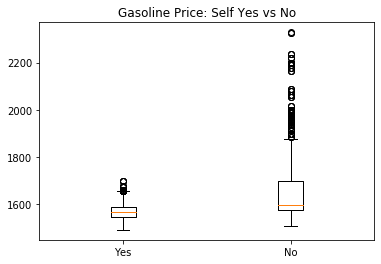

In [29]:
# 셀프여부별 휘발유 가격 시각화.
Yes = df[df.셀프여부 == 'Y'].휘발유     #셀프인 곳의 휘발유
No = df[df.셀프여부 == 'N'].휘발유      #셀프아닌 곳의 휘발유
plt.boxplot([Yes,No],0,labels=['Yes','No'])
plt.title('Gasoline Price: Self Yes vs No')  #평균은 별 차이 안남(박스플롯) 
                                             #오른쪽 박스플록 위에 가격 높은거 3개 => 셀프가 아닌곳은 바가지가 있다는 의미 
plt.show()          

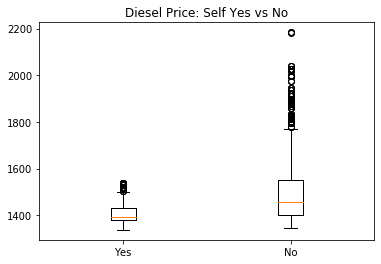

In [30]:
# 셀프여부별 경유 가격 시각화.   
Yes = df[df.셀프여부 == 'Y'].경유
No = df[df.셀프여부 == 'N'].경유
plt.boxplot([Yes,No],0,labels=['Yes','No'])
plt.title('Diesel Price: Self Yes vs No')
plt.show()